Dataset loaded successfully:
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  Satisfacti

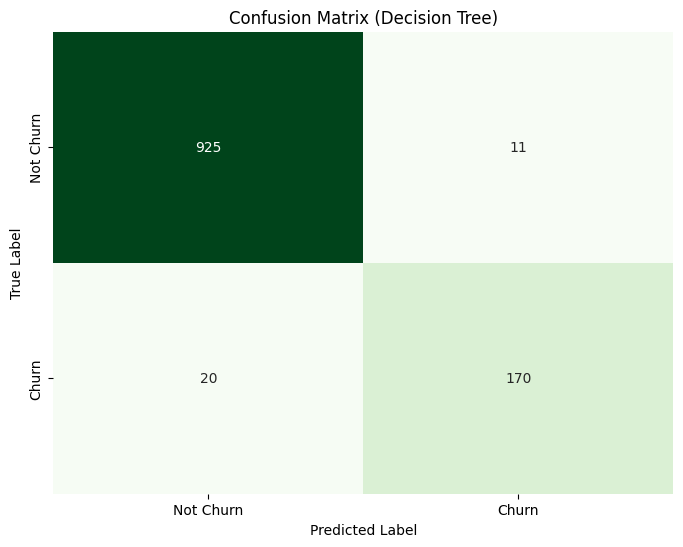


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       936
           1       0.94      0.89      0.92       190

    accuracy                           0.97      1126
   macro avg       0.96      0.94      0.95      1126
weighted avg       0.97      0.97      0.97      1126


Feature Importance (Decision Tree):
                                  Feature  Importance
0                                  Tenure    0.270015
6                         NumberOfAddress    0.088711
12                         CashbackAmount    0.074482
11                      DaySinceLastOrder    0.066357
2                         WarehouseToHome    0.066076
7                                Complain    0.064155
8             OrderAmountHikeFromlastYear    0.055672
4                NumberOfDeviceRegistered    0.055131
5                       SatisfactionScore    0.049186
21                            Gender_Male    0.026149
1                 

/var/folders/kw/rtpfp9xx5vj8h1n_95hjltnm0000gn/T/ipykernel_90387/829903789.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette="viridis") # Changed palette


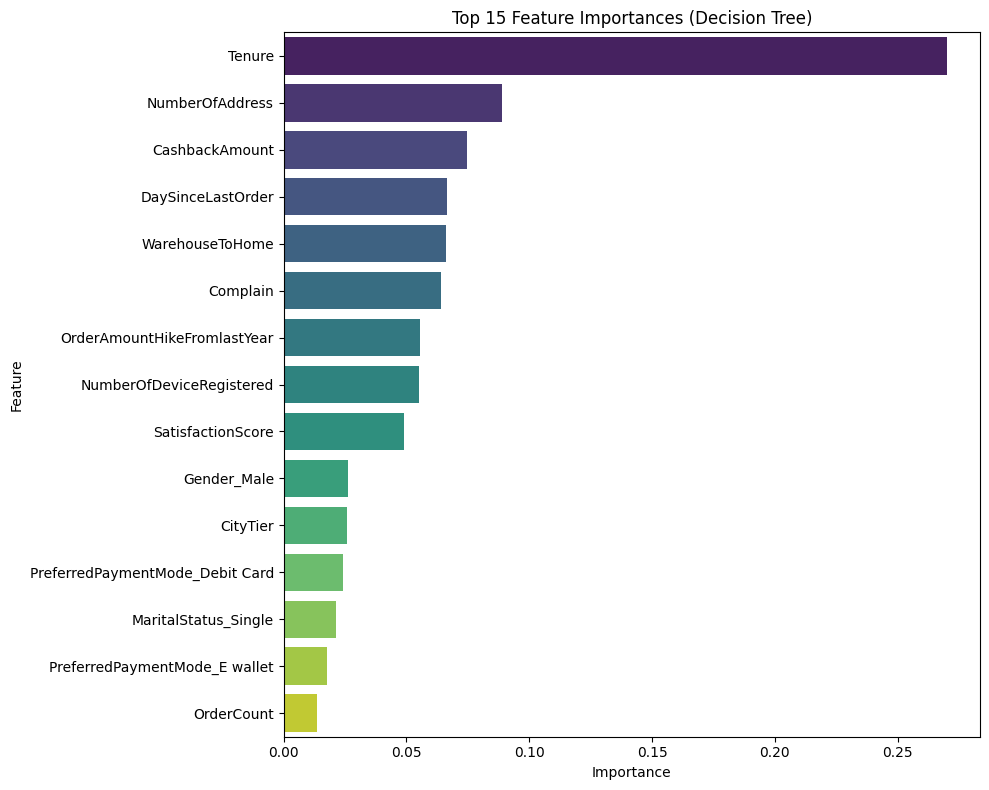


Attempting to visualize the Decision Tree...
Note: This may be very large and hard to read if the tree is deep.
For a clearer visualization, you might train a tree with a limited 'max_depth', e.g., DecisionTreeClassifier(max_depth=3, random_state=42)


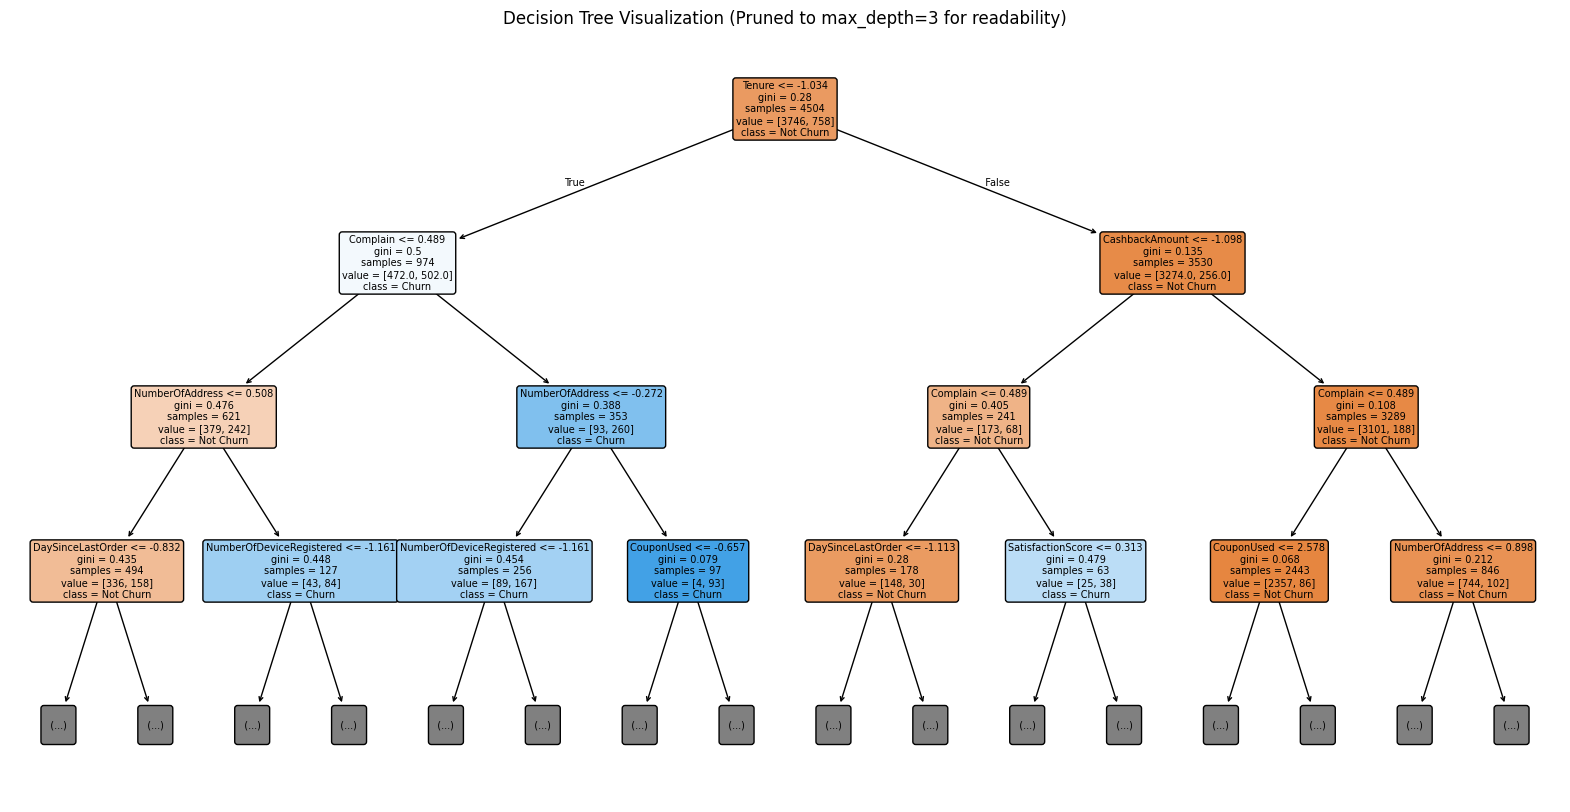


If the tree above is too dense, consider increasing figsize or further reducing max_depth for visualization purposes.
Alternatively, train a separate, shallower tree specifically for visualization.


In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # Added DecisionTreeClassifier and plot_tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cell 2: Load the dataset
# Make sure to replace 'ECommerce_Churn_Data.csv' with the actual path/name of your dataset file if it's different.
try:
    df = pd.read_csv('ECommerce_Churn_Data.csv')
except FileNotFoundError:
    print("Error: The dataset file 'ECommerce_Churn_Data.csv' was not found.")
    print("Please download the dataset from https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?resource=download")
    print("and place it in the correct directory or update the file path.")
    df = pd.DataFrame() # Create an empty DataFrame to avoid NameError

if not df.empty:
    print("Dataset loaded successfully:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
    print("\nDataset Description:")
    print(df.describe())

# Cell 3: Initial Data Exploration & Preprocessing (if dataset loaded)
if not df.empty:
    print("\nColumn Names:")
    print(df.columns)

    target_column = 'Churn' # Assuming 'Churn' is the target variable

    if target_column not in df.columns:
        print(f"\nError: Target column '{target_column}' not found in the dataset.")
        print("Please verify the target column name.")
    else:
        print(f"\nTarget variable: '{target_column}'")
        print(df[target_column].value_counts(normalize=True))

        if 'CustomerID' in df.columns:
            df = df.drop('CustomerID', axis=1)
            print("\nDropped 'CustomerID' column.")

        print("\nMissing values before handling:")
        print(df.isnull().sum())
        for column in df.select_dtypes(include=['object']).columns:
            df[column] = df[column].fillna(df[column].mode()[0])
        for column in df.select_dtypes(include=[np.number]).columns:
            if column != target_column:
                 df[column] = df[column].fillna(df[column].median())
        print("\nMissing values after handling:")
        print(df.isnull().sum())

        features = [col for col in df.columns if col != target_column]
        categorical_features = df[features].select_dtypes(include=['object']).columns.tolist()
        numerical_features = df[features].select_dtypes(include=[np.number]).columns.tolist()

        print("\nCategorical Features:", categorical_features)
        print("Numerical Features:", numerical_features)

# Cell 4: Define Preprocessing Steps (if dataset loaded and processed)
if not df.empty and target_column in df.columns:
    numerical_transformer = StandardScaler() # Good practice, though trees are less sensitive
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough'
    )

    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("\nShape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of y_test:", y_test.shape)

# Cell 5: Create and Train the Decision Tree Model (if X_train, y_train exist)
if 'X_train' in locals() and 'y_train' in locals():
    # Create the Decision Tree pipeline
    # You might want to tune hyperparameters like max_depth, min_samples_split, min_samples_leaf
    dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', DecisionTreeClassifier(random_state=42))]) # Added DecisionTreeClassifier

    # Train the model
    print("\nTraining the Decision Tree model...")
    dt_pipeline.fit(X_train, y_train)
    print("Model training complete.")
    print("\nNote: Consider hyperparameter tuning (e.g., max_depth) for Decision Trees to prevent overfitting and improve generalization.")

# Cell 6: Make Predictions and Evaluate the Model (if model is trained)
if 'dt_pipeline' in locals() and 'X_test' in locals():
    y_pred = dt_pipeline.predict(X_test)
    y_pred_proba = dt_pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("\nModel Evaluation (Decision Tree):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, # Changed cmap for variety
                xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Decision Tree)')
    plt.show()

    print("\nClassification Report:")
    print(class_report)

# Cell 7: Feature Importance (from Decision Tree) (if model is trained)
if 'dt_pipeline' in locals():
    try:
        ohe_feature_names = dt_pipeline.named_steps['preprocessor'] \
                                       .named_transformers_['cat'] \
                                       .get_feature_names_out(categorical_features)
        
        all_feature_names = numerical_features + list(ohe_feature_names)
        
        # Get feature importances from the decision tree model
        importances = dt_pipeline.named_steps['classifier'].feature_importances_

        feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        print("\nFeature Importance (Decision Tree):")
        print(feature_importance_df)

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette="viridis") # Changed palette
        plt.title('Top 15 Feature Importances (Decision Tree)')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\nCould not display feature importance: {e}")

# Cell 8: Visualize the Decision Tree (Optional, can be large and unreadable for deep trees)
if 'dt_pipeline' in locals():
    print("\nAttempting to visualize the Decision Tree...")
    print("Note: This may be very large and hard to read if the tree is deep.")
    print("For a clearer visualization, you might train a tree with a limited 'max_depth', e.g., DecisionTreeClassifier(max_depth=3, random_state=42)")
    
    try:
        # We need the trained classifier step and the feature names from the preprocessor
        clf_step = dt_pipeline.named_steps['classifier']
        preprocessor_step = dt_pipeline.named_steps['preprocessor']
        
        # Fit the preprocessor on training data to get feature names
        # This is already done during pipeline.fit, but to get names in order, it's good to be explicit
        # For plot_tree, we need the feature names as they are *after* transformation
        
        # Get transformed feature names
        transformed_feature_names = list(numerical_features) + \
                                    list(preprocessor_step.named_transformers_['cat'].get_feature_names_out(categorical_features))

        plt.figure(figsize=(20,10)) # Adjust size as needed
        plot_tree(clf_step, 
                  filled=True, 
                  feature_names=transformed_feature_names, 
                  class_names=['Not Churn', 'Churn'], # Ensure correct class order
                  rounded=True,
                  fontsize=7,
                  max_depth=3) # Limiting max_depth for initial visualization to avoid clutter. Remove or adjust as needed.
        plt.title("Decision Tree Visualization (Pruned to max_depth=3 for readability)")
        plt.show()
        
        print("\nIf the tree above is too dense, consider increasing figsize or further reducing max_depth for visualization purposes.")
        print("Alternatively, train a separate, shallower tree specifically for visualization.")

    except Exception as e:
        print(f"Could not plot tree: {e}")
        print("Tree visualization can be complex with many features or deep trees.")